# Note

Data preprocessing is required for visualization.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KLASA/Datasets/SEKDA CSV Files/Data Simpanan, Kredit, Pinjaman Jawa dan Bali.csv')
df.head()

,Provinsi,Bulan,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Jawa Barat,January 2019,"Rp484,419,419","Rp76,332,706","Rp213,607,476","Rp194,479,237","Rp679,017,161","Rp266,643,181","Rp114,122,881","Rp298,251,099","Rp137,492,403","Rp35,588,997","Rp39,756,077","Rp62,147,329"
1,Jawa Barat,February 2019,"Rp489,054,706","Rp79,880,748","Rp213,447,064","Rp195,726,894","Rp688,685,260","Rp271,180,462","Rp115,519,174","Rp301,985,624","Rp138,339,418","Rp36,264,850","Rp40,419,671","Rp61,654,896"
2,Jawa Barat,March 2019,"Rp495,562,164","Rp88,375,994","Rp214,534,968","Rp192,651,202","Rp699,022,448","Rp278,378,232","Rp115,704,236","Rp304,939,980","Rp140,781,286","Rp36,927,149","Rp41,337,750","Rp62,516,388"
3,Jawa Barat,April 2019,"Rp502,709,279","Rp86,058,198","Rp215,968,564","Rp200,682,517","Rp703,343,859","Rp280,218,161","Rp115,642,655","Rp307,483,043","Rp143,198,599","Rp38,093,640","Rp41,870,579","Rp63,234,379"
4,Jawa Barat,May 2019,"Rp515,807,998","Rp81,036,444","Rp227,118,656","Rp207,652,898","Rp713,127,042","Rp284,619,184","Rp117,452,542","Rp311,055,317","Rp145,375,283","Rp39,505,967","Rp42,370,001","Rp63,499,316"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provinsi                 231 non-null    object
 1   Bulan                    231 non-null    object
 2   Simpanan                 231 non-null    object
 3   - Giro                   231 non-null    object
 4   - Tabungan               231 non-null    object
 5   - Simpanan Berjangka     231 non-null    object
 6   Pinjaman yang diberikan  231 non-null    object
 7   - Modal Kerja            231 non-null    object
 8   - Investasi              231 non-null    object
 9   - Konsumsi               231 non-null    object
 10  Kredit UMKM              231 non-null    object
 11  - Mikro                  231 non-null    object
 12  - Kecil                  231 non-null    object
 13  - Menengah               231 non-null    object
dtypes: object(14)
memory usage: 25.4+ KB


In [ ]:
list(df.columns)[2:]

['Simpanan',
 '- Giro',
 '- Tabungan',
 '- Simpanan Berjangka',
 'Pinjaman yang diberikan',
 '- Modal Kerja',
 '- Investasi',
 '- Konsumsi',
 'Kredit UMKM',
 '- Mikro',
 '- Kecil',
 '- Menengah']

In [ ]:
numerical_columns = list(df.columns)[2:]
numerical_df = df[numerical_columns]
numerical_df.head()

,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,"Rp484,419,419","Rp76,332,706","Rp213,607,476","Rp194,479,237","Rp679,017,161","Rp266,643,181","Rp114,122,881","Rp298,251,099","Rp137,492,403","Rp35,588,997","Rp39,756,077","Rp62,147,329"
1,"Rp489,054,706","Rp79,880,748","Rp213,447,064","Rp195,726,894","Rp688,685,260","Rp271,180,462","Rp115,519,174","Rp301,985,624","Rp138,339,418","Rp36,264,850","Rp40,419,671","Rp61,654,896"
2,"Rp495,562,164","Rp88,375,994","Rp214,534,968","Rp192,651,202","Rp699,022,448","Rp278,378,232","Rp115,704,236","Rp304,939,980","Rp140,781,286","Rp36,927,149","Rp41,337,750","Rp62,516,388"
3,"Rp502,709,279","Rp86,058,198","Rp215,968,564","Rp200,682,517","Rp703,343,859","Rp280,218,161","Rp115,642,655","Rp307,483,043","Rp143,198,599","Rp38,093,640","Rp41,870,579","Rp63,234,379"
4,"Rp515,807,998","Rp81,036,444","Rp227,118,656","Rp207,652,898","Rp713,127,042","Rp284,619,184","Rp117,452,542","Rp311,055,317","Rp145,375,283","Rp39,505,967","Rp42,370,001","Rp63,499,316"


In [ ]:
for col in numerical_columns:
    for i in range(numerical_df.shape[0]):
        numerical_df[col][i] = float(numerical_df[col][i].strip('Rp').replace(',', ''))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
numerical_df = numerical_df.astype(float)
numerical_df.head()

,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,484419419.0,76332706.0,213607476.0,194479237.0,679017161.0,266643181.0,114122881.0,298251099.0,137492403.0,35588997.0,39756077.0,62147329.0
1,489054706.0,79880748.0,213447064.0,195726894.0,688685260.0,271180462.0,115519174.0,301985624.0,138339418.0,36264850.0,40419671.0,61654896.0
2,495562164.0,88375994.0,214534968.0,192651202.0,699022448.0,278378232.0,115704236.0,304939980.0,140781286.0,36927149.0,41337750.0,62516388.0
3,502709279.0,86058198.0,215968564.0,200682517.0,703343859.0,280218161.0,115642655.0,307483043.0,143198599.0,38093640.0,41870579.0,63234379.0
4,515807998.0,81036444.0,227118656.0,207652898.0,713127042.0,284619184.0,117452542.0,311055317.0,145375283.0,39505967.0,42370001.0,63499316.0


# Split Month and Year

In [ ]:
categorical_df = df[df.columns[:2]]
categorical_df.head()

,Provinsi,Bulan
0,Jawa Barat,January 2019
1,Jawa Barat,February 2019
2,Jawa Barat,March 2019
3,Jawa Barat,April 2019
4,Jawa Barat,May 2019


In [ ]:
categorical_df['Tahun'] = categorical_df['Bulan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(categorical_df.shape[0]):
    categorical_df['Tahun'][i] = categorical_df['Bulan'][i].split()[1]
    categorical_df['Bulan'][i] = categorical_df['Bulan'][i].split()[0]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


# Convert Month and Year to Integer

In [ ]:
for i in range(categorical_df.shape[0]):
    datetime_object = datetime.datetime.strptime(categorical_df['Bulan'][i], '%B')
    categorical_df['Bulan'][i] = datetime_object.month

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
categorical_df['Bulan'] = categorical_df['Bulan'].astype(int)
categorical_df['Tahun'] = categorical_df['Tahun'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Combined Data

In [ ]:
df = categorical_df.join(numerical_df)
df.head()

,Provinsi,Bulan,Tahun,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Jawa Barat,1,2019,484419419.0,76332706.0,213607476.0,194479237.0,679017161.0,266643181.0,114122881.0,298251099.0,137492403.0,35588997.0,39756077.0,62147329.0
1,Jawa Barat,2,2019,489054706.0,79880748.0,213447064.0,195726894.0,688685260.0,271180462.0,115519174.0,301985624.0,138339418.0,36264850.0,40419671.0,61654896.0
2,Jawa Barat,3,2019,495562164.0,88375994.0,214534968.0,192651202.0,699022448.0,278378232.0,115704236.0,304939980.0,140781286.0,36927149.0,41337750.0,62516388.0
3,Jawa Barat,4,2019,502709279.0,86058198.0,215968564.0,200682517.0,703343859.0,280218161.0,115642655.0,307483043.0,143198599.0,38093640.0,41870579.0,63234379.0
4,Jawa Barat,5,2019,515807998.0,81036444.0,227118656.0,207652898.0,713127042.0,284619184.0,117452542.0,311055317.0,145375283.0,39505967.0,42370001.0,63499316.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provinsi                 231 non-null    object 
 1   Bulan                    231 non-null    int64  
 2   Tahun                    231 non-null    int64  
 3   Simpanan                 231 non-null    float64
 4   - Giro                   231 non-null    float64
 5   - Tabungan               231 non-null    float64
 6   - Simpanan Berjangka     231 non-null    float64
 7   Pinjaman yang diberikan  231 non-null    float64
 8   - Modal Kerja            231 non-null    float64
 9   - Investasi              231 non-null    float64
 10  - Konsumsi               231 non-null    float64
 11  Kredit UMKM              231 non-null    float64
 12  - Mikro                  231 non-null    float64
 13  - Kecil                  231 non-null    float64
 14  - Menengah               2

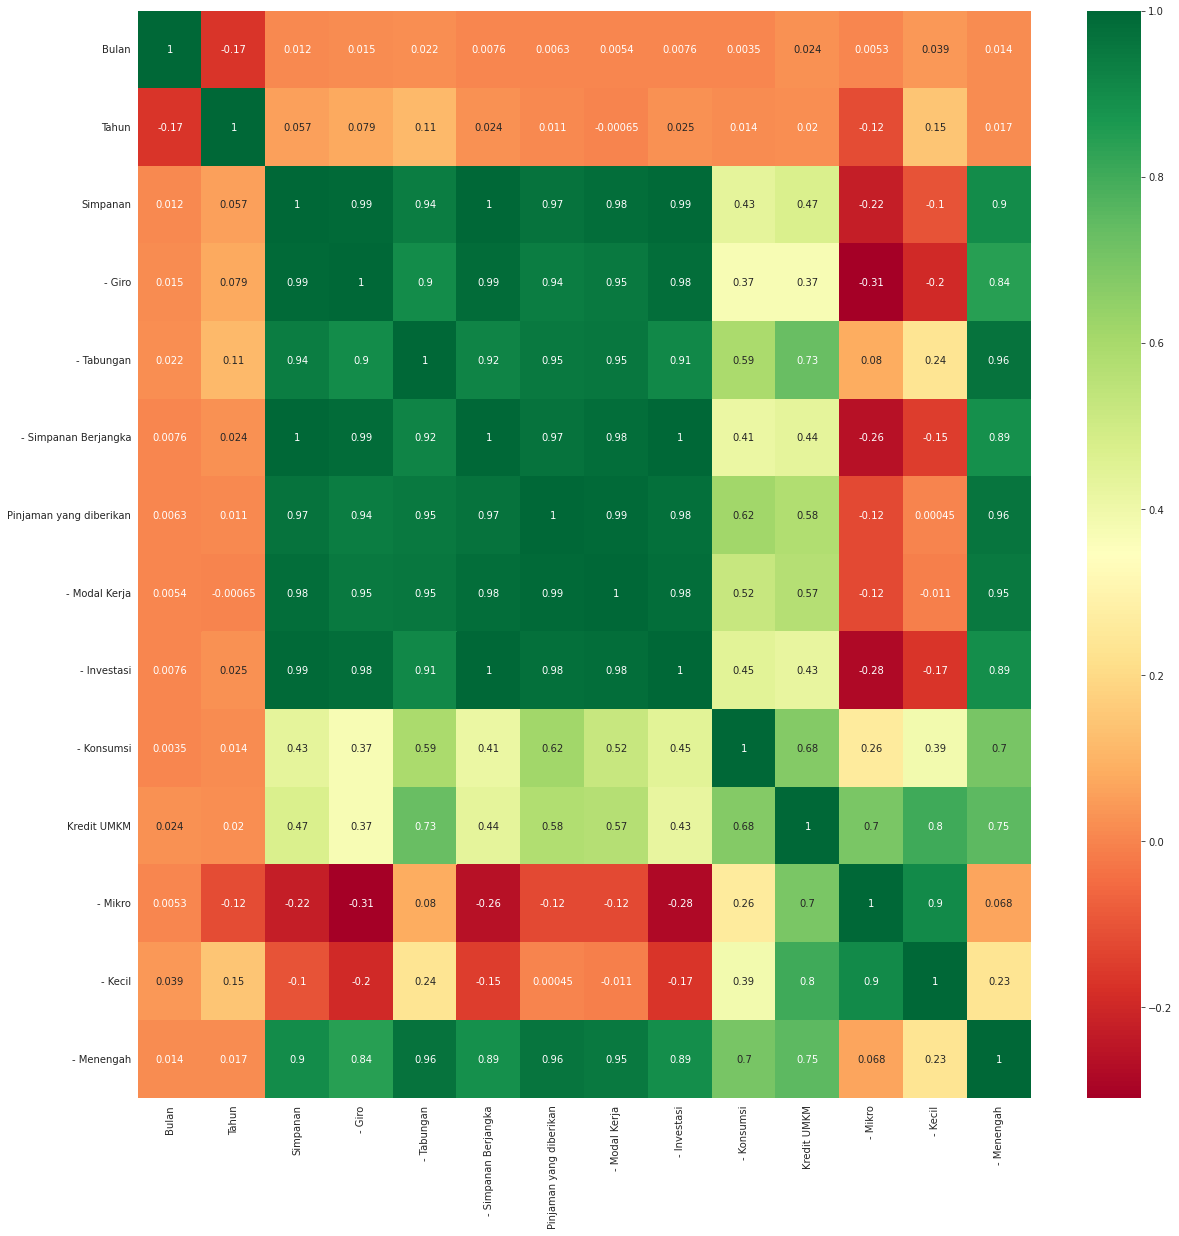

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# Save Preprocessed Data Frame

This data frame is ready for visualization.

In [ ]:
df.to_csv('(Preprocessed) Data Simpanan, Kredit, Pinjaman Jawa dan Bali.csv', index = False)

# New Cases Data

In [ ]:
new_cases_df = pd.read_excel('/content/drive/MyDrive/KLASA/Datasets/kasus_aktif_Indonesia.xlsx')
new_cases_df

,Tanggal,Provinsi,Kasus Aktif
0,2020-03-21,Jawa Barat,47
1,2020-03-22,Jawa Barat,45
2,2020-03-23,Jawa Barat,45
3,2020-03-24,Jawa Barat,45
4,2020-03-25,Jawa Barat,58
...,...,...,...
3908,2021-09-26,Bali,1514
3909,2021-09-27,Bali,1438
3910,2021-09-28,Bali,1259
3911,2021-09-29,Bali,1160


In [ ]:
new_cases_df['Provinsi'].unique()

array(['Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Banten',
       'DKI Jakarta', 'Jawa Timur', 'Bali'], dtype=object)

In [ ]:
df['Provinsi'].unique()

array(['Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Banten',
       'DKI Jakarta', 'Jawa Timur', 'Bali'], dtype=object)

# Split Date into Day, Month, and Year

In [ ]:
new_cases_df['Tanggal'] = new_cases_df['Tanggal'].astype('str')

In [ ]:
new_cases_df['Bulan'] = new_cases_df['Tanggal']
new_cases_df['Tahun'] = new_cases_df['Tanggal']

In [ ]:
for i in range(new_cases_df.shape[0]):
    year, month, day = [int(x) for x in new_cases_df['Tanggal'][i].split('-')]
    new_cases_df['Tahun'][i] = year
    new_cases_df['Bulan'][i] = month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_cases_df

,Tanggal,Provinsi,Kasus Aktif,Bulan,Tahun
0,2020-03-21,Jawa Barat,47,3,2020
1,2020-03-22,Jawa Barat,45,3,2020
2,2020-03-23,Jawa Barat,45,3,2020
3,2020-03-24,Jawa Barat,45,3,2020
4,2020-03-25,Jawa Barat,58,3,2020
...,...,...,...,...,...
3908,2021-09-26,Bali,1514,9,2021
3909,2021-09-27,Bali,1438,9,2021
3910,2021-09-28,Bali,1259,9,2021
3911,2021-09-29,Bali,1160,9,2021


In [ ]:
new_cases_df.groupby(['Provinsi', 'Tahun', 'Bulan']).agg({'Kasus Aktif': 'sum'})

Kasus Aktif
Provinsi   Tahun Bulan             
Bali       2020  3               81
                 4             2118
                 5             3232
                 6            10178
                 7            22564
...                             ...
Jawa Timur 2021  5            50236
                 6           125110
                 7          1064232
                 8           981035
                 9           148457

[133 rows x 1 columns]

The new cases data only consists of new cases from March 2020 to September 2021, so we need to extract the previous data (`df`) according to that period of time.

### Note:
New cases data in March 2020 is not complete (only several days), so simply exclude the data from March 2020.

In [ ]:
condition_1 = new_cases_df['Tahun'] >= 2020
condition_2 = new_cases_df['Bulan'] >= 4
condition_3 = new_cases_df['Bulan'] <= 9
new_cases_mar20_to_sep21_df = new_cases_df[condition_1 & condition_2 & condition_3]

In [ ]:
new_cases_subset_df = new_cases_mar20_to_sep21_df.groupby(['Provinsi', 'Tahun', 'Bulan']).agg({'Kasus Aktif': 'sum'}).reset_index()
new_cases_subset_df

,Provinsi,Tahun,Bulan,Kasus Aktif
0,Bali,2020,4,2118
1,Bali,2020,5,3232
2,Bali,2020,6,10178
3,Bali,2020,7,22564
4,Bali,2020,8,15279
...,...,...,...,...
79,Jawa Timur,2021,5,50236
80,Jawa Timur,2021,6,125110
81,Jawa Timur,2021,7,1064232
82,Jawa Timur,2021,8,981035


There are 84 rows in the table, now do the same process for the SEKDA Dataset (`df`), only get the data from April 2020 to September 2021.

In [ ]:
df.head()

,Provinsi,Bulan,Tahun,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Jawa Barat,1,2019,484419419.0,76332706.0,213607476.0,194479237.0,679017161.0,266643181.0,114122881.0,298251099.0,137492403.0,35588997.0,39756077.0,62147329.0
1,Jawa Barat,2,2019,489054706.0,79880748.0,213447064.0,195726894.0,688685260.0,271180462.0,115519174.0,301985624.0,138339418.0,36264850.0,40419671.0,61654896.0
2,Jawa Barat,3,2019,495562164.0,88375994.0,214534968.0,192651202.0,699022448.0,278378232.0,115704236.0,304939980.0,140781286.0,36927149.0,41337750.0,62516388.0
3,Jawa Barat,4,2019,502709279.0,86058198.0,215968564.0,200682517.0,703343859.0,280218161.0,115642655.0,307483043.0,143198599.0,38093640.0,41870579.0,63234379.0
4,Jawa Barat,5,2019,515807998.0,81036444.0,227118656.0,207652898.0,713127042.0,284619184.0,117452542.0,311055317.0,145375283.0,39505967.0,42370001.0,63499316.0


In [ ]:
condition_1 = df['Tahun'] >= 2020
condition_2 = df['Bulan'] >= 4
condition_3 = df['Bulan'] <= 9
sekda_subset_df = df[condition_1 & condition_2 & condition_3].reset_index().drop('index', axis = 1)
sekda_subset_df

,Provinsi,Bulan,Tahun,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Jawa Barat,4,2020,540910565.0,90713363.0,235645592.0,214551610.0,724794059.0,290107562.0,123878216.0,310808282.0,150958429.0,43184128.0,44712083.0,63062218.0
1,Jawa Barat,5,2020,545955618.0,88680588.0,243105055.0,214169974.0,740104423.0,294652214.0,128600587.0,316851622.0,147378251.0,41217432.0,44141215.0,62019605.0
2,Jawa Barat,6,2020,558785040.0,99851848.0,243250967.0,215682226.0,738933160.0,294362677.0,128636345.0,315934138.0,147494343.0,40432470.0,44394760.0,62667112.0
3,Jawa Barat,7,2020,558266211.0,95288702.0,243690721.0,219286789.0,742106139.0,295365910.0,129795894.0,316944336.0,147009252.0,39234307.0,44501313.0,63273632.0
4,Jawa Barat,8,2020,557747382.0,90725555.0,244130475.0,222891352.0,741756379.0,295421282.0,129027502.0,317307595.0,147406767.0,38168121.0,44628366.0,64610280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Bali,5,2021,105547656.0,12284147.0,50238158.0,43025351.0,114692134.0,39137307.0,36991148.0,38563679.0,40112377.0,7396403.0,16453542.0,16262432.0
80,Bali,6,2021,108062863.0,13588808.0,51506133.0,42967922.0,114809125.0,39133237.0,37400142.0,38275746.0,40690580.0,7450740.0,16843689.0,16396150.0
81,Bali,7,2021,106966915.0,12622620.0,51892752.0,42451543.0,113155386.0,37552905.0,37437054.0,38165428.0,40482248.0,7457012.0,17038874.0,15986363.0
82,Bali,8,2021,105607342.0,11886268.0,51363045.0,42358029.0,113017371.0,37688157.0,37391399.0,37937815.0,40657669.0,7524434.0,17314721.0,15818513.0


There are also 84 rows in the SEKDA data frame, which is the same as the new cases data (`new_cases_subset_df`).

# Combined Both Dataset

In [ ]:
new_cases_subset_df.head()

,Provinsi,Tahun,Bulan,Kasus Aktif
0,Bali,2020,4,2118
1,Bali,2020,5,3232
2,Bali,2020,6,10178
3,Bali,2020,7,22564
4,Bali,2020,8,15279


In [ ]:
sekda_subset_df.head()

,Provinsi,Bulan,Tahun,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Jawa Barat,4,2020,540910565.0,90713363.0,235645592.0,214551610.0,724794059.0,290107562.0,123878216.0,310808282.0,150958429.0,43184128.0,44712083.0,63062218.0
1,Jawa Barat,5,2020,545955618.0,88680588.0,243105055.0,214169974.0,740104423.0,294652214.0,128600587.0,316851622.0,147378251.0,41217432.0,44141215.0,62019605.0
2,Jawa Barat,6,2020,558785040.0,99851848.0,243250967.0,215682226.0,738933160.0,294362677.0,128636345.0,315934138.0,147494343.0,40432470.0,44394760.0,62667112.0
3,Jawa Barat,7,2020,558266211.0,95288702.0,243690721.0,219286789.0,742106139.0,295365910.0,129795894.0,316944336.0,147009252.0,39234307.0,44501313.0,63273632.0
4,Jawa Barat,8,2020,557747382.0,90725555.0,244130475.0,222891352.0,741756379.0,295421282.0,129027502.0,317307595.0,147406767.0,38168121.0,44628366.0,64610280.0


Make sure the province names are same in both datasets.

In [ ]:
sorted(list(sekda_subset_df['Provinsi'].unique()))

['Bali',
 'Banten',
 'DI Yogyakarta',
 'DKI Jakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'Jawa Timur']

In [ ]:
sorted(list(new_cases_subset_df['Provinsi'].unique()))

['Bali',
 'Banten',
 'DI Yogyakarta',
 'DKI Jakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'Jawa Timur']

In [ ]:
combined_df = pd.merge(new_cases_subset_df, sekda_subset_df, how = 'inner')
combined_df

,Provinsi,Tahun,Bulan,Kasus Aktif,Simpanan,- Giro,- Tabungan,- Simpanan Berjangka,Pinjaman yang diberikan,- Modal Kerja,- Investasi,- Konsumsi,Kredit UMKM,- Mikro,- Kecil,- Menengah
0,Bali,2020,4,2118,108465251.0,13929804.0,51276092.0,43259356.0,103314353.0,32967576.0,34189901.0,36156876.0,38723606.0,8444482.0,15000649.0,15278476.0
1,Bali,2020,5,3232,106928472.0,12877022.0,50489379.0,43562070.0,113922313.0,38437076.0,35371599.0,40113638.0,38364804.0,8341527.0,14731092.0,15292186.0
2,Bali,2020,6,10178,106319861.0,13067021.0,49914454.0,43338387.0,114304316.0,39178376.0,35170045.0,39955896.0,38324548.0,8245963.0,14725291.0,15353293.0
3,Bali,2020,7,22564,105873506.0,13028959.0,49483226.0,43361322.0,115279987.0,39728478.0,35592727.0,39958781.0,38505090.0,8134527.0,14744531.0,15626032.0
4,Bali,2020,8,15279,105427151.0,12990896.0,49051998.0,43384257.0,115398920.0,40005350.0,35545079.0,39848491.0,38874446.0,8054355.0,14877059.0,15943032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Jawa Timur,2021,5,50236,650934172.0,109279720.0,282576765.0,259077687.0,560474636.0,296829563.0,100149905.0,163495168.0,161404220.0,35981279.0,58003082.0,67419860.0
80,Jawa Timur,2021,6,125110,661850468.0,116333427.0,289693326.0,255823715.0,567747291.0,300716605.0,100728363.0,166302323.0,163200893.0,36166741.0,59346593.0,67687560.0
81,Jawa Timur,2021,7,1064232,660707946.0,112181827.0,291678062.0,256848057.0,562066669.0,293496073.0,102954932.0,165615664.0,163331085.0,35892299.0,60118569.0,67320217.0
82,Jawa Timur,2021,8,981035,673182638.0,120059955.0,293550529.0,259572155.0,565107244.0,296397212.0,103145882.0,165564150.0,165033600.0,36451179.0,61859139.0,66723281.0


In [ ]:
simpanan_and_kasus_aktif_df = combined_df[['Simpanan', 'Kasus Aktif']]
simpanan_and_kasus_aktif_df.head()

,Simpanan,Kasus Aktif
0,108465251.0,2118
1,106928472.0,3232
2,106319861.0,10178
3,105873506.0,22564
4,105427151.0,15279


# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_columns = standard_scaler.fit_transform(simpanan_and_kasus_aktif_df)
simpanan_and_kasus_aktif_df_scaled = pd.DataFrame(scaled_columns, columns = simpanan_and_kasus_aktif_df.columns)
simpanan_and_kasus_aktif_df_scaled

,Simpanan,Kasus Aktif
0,-0.676917,-0.572579
1,-0.678510,-0.570552
2,-0.679141,-0.557912
3,-0.679604,-0.535373
4,-0.680067,-0.548630
...,...,...
79,-0.114599,-0.485018
80,-0.103283,-0.348767
81,-0.104467,1.360179
82,-0.091536,1.208784


# Visualization

### Simpanan vs. Kasus Aktif

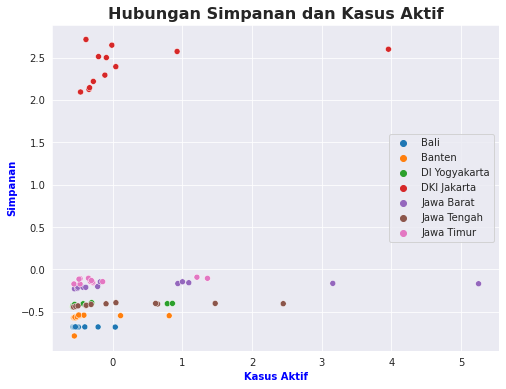

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Kasus Aktif', y = 'Simpanan', hue = combined_df['Provinsi'], data = simpanan_and_kasus_aktif_df_scaled)
plt.title('Hubungan Simpanan dan Kasus Aktif', fontsize = 16, fontweight = 'bold')
plt.legend(loc = 'center right')
plt.xlabel('Kasus Aktif', color = 'Blue', fontweight = 'bold')
plt.ylabel('Simpanan', color = 'Blue', fontweight = 'bold')
plt.show()

In [ ]:
simpanan_and_kasus_aktif_df_scaled = combined_df[['Simpanan', 'Kasus Aktif']]
print('Korelasi Simpanan dan Kasus Aktif: {}'.format(simpanan_and_kasus_aktif_df_scaled.corr()['Simpanan']['Kasus Aktif']))

Korelasi Simpanan dan Kasus Aktif: 0.1571270393227253


In [ ]:
methods = ['pearson', 'spearman', 'kendall']
for method in methods:
    correlation = simpanan_and_kasus_aktif_df_scaled.corr(method = method)['Simpanan']['Kasus Aktif']
    print(f'{method}: {correlation}')

pearson: 0.1571270393227253
spearman: 0.5508788637600657
kendall: 0.371839633135022


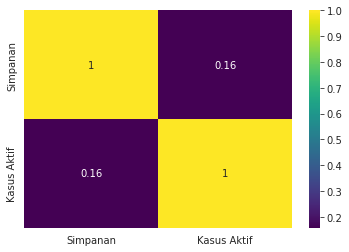

In [ ]:
sns.heatmap(simpanan_and_kasus_aktif_df_scaled.corr(), annot = True, cmap = 'viridis')
plt.show()

### Pinjaman yang diberikan vs. Kasus Aktif

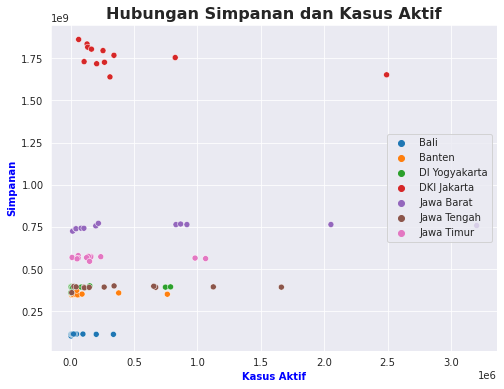

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Kasus Aktif', y = 'Pinjaman yang diberikan', hue = combined_df['Provinsi'], data = combined_df)
plt.title('Hubungan Simpanan dan Kasus Aktif', fontsize = 16, fontweight = 'bold')
plt.legend(loc = 'center right')
plt.xlabel('Kasus Aktif', color = 'Blue', fontweight = 'bold')
plt.ylabel('Simpanan', color = 'Blue', fontweight = 'bold')
plt.show()

In [ ]:
combined_df[['Pinjaman yang diberikan', 'Kasus Aktif']].corr()

,Pinjaman yang diberikan,Kasus Aktif
Pinjaman yang diberikan,1.000000,0.189299
Kasus Aktif,0.189299,1.000000


### Kredit UMKM vs. Kasus Aktif

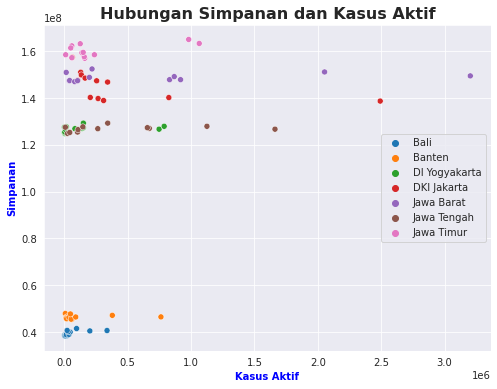

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Kasus Aktif', y = 'Kredit UMKM', hue = combined_df['Provinsi'], data = combined_df)
plt.title('Hubungan Simpanan dan Kasus Aktif', fontsize = 16, fontweight = 'bold')
plt.legend(loc = 'center right')
plt.xlabel('Kasus Aktif', color = 'Blue', fontweight = 'bold')
plt.ylabel('Simpanan', color = 'Blue', fontweight = 'bold')
plt.show()

In [ ]:
combined_df[['Kredit UMKM', 'Kasus Aktif']].corr()

,Kredit UMKM,Kasus Aktif
Kredit UMKM,1.000000,0.259306
Kasus Aktif,0.259306,1.000000


# Save Combined Data For Further Visualization

In [ ]:
combined_df.to_csv('combined_df.csv', index = False)